In [8]:
%pylab inline
from requests import Session
import pandas as pd
from bs4 import BeautifulSoup

Populating the interactive namespace from numpy and matplotlib


In [9]:
#LOAD CORDOBA DATA

session = Session() #Para tomar datos vamos a generar una sesion que tiene todas las cosas que se pueden necesitar

# HEAD requests ask for *just* the headers, which is all you need to grab the
# session cookie
session.head('http://clima.bccba.com.ar/') #Para obviar a las cookies

response = session.post(
    url='http://clima.bccba.com.ar/xmlDatosEstaciones.php',
) #donde toma los datos

print(response.text) #los datos que voy a considerar

<?xml version='1.0' encoding='ISO-8859-1'?>
<ajax-response>
	<RedEstaciones>	<Estacion>
					<numero>30076</numero>
					<nombre>Acipro Santa Rosa 1</nombre>
					<latitud>-31.1903</latitud>
					<longitud>-63.4508</longitud>
					<altura>197</altura>
					<localidad>Rio Primero</localidad>
					<provincia>Cordoba</provincia>
					<fechaInstalacion>11/06/2015</fechaInstalacion>
					<fechaMuestra>05/08/2016 14:30</fechaMuestra>
					<temperatura>20.4</temperatura>
					<temperaturaMaxima>20.4</temperaturaMaxima>
					<temperaturaMinima>9.4</temperaturaMinima>
					<humedad>70</humedad>
					<puntoRocio>14.8</puntoRocio>
					<sensacionTermica>22.1</sensacionTermica>
					<velocidadViento>20.7</velocidadViento>
					<direccionViento>SUR</direccionViento>
					<precipitacionDia>0</precipitacionDia>
					<precipitacionSemana>0.4</precipitacionSemana>
					<precipitacionMes>0.4</precipitacionMes>
					<operativa>1</operativa>
					<nota>--</nota>
				</Estacion>	<Estacion>
					<numero>300

In [12]:
soup = BeautifulSoup(response.text, "lxml") #como es un xml, beautifull tiene un modulo de eso

In [13]:
data={} #genero un diccionario vacio

#Cada estacion es una etiqueta. El primer for avanza para cada etiqueta (estacion)
for es in soup.find_all('estacion'): 
    vehicle = {child.name: child.text for child in es.findChildren()} #genera un direccionario dentro de otro diccionario. Dentro de la key estacion esta el diccionario de la estacion. donde key es temperatura y el texto son los valores.
    for v in vehicle.keys(): #para cada elemento de la variable
#        data[v].append(vehicle[v])
        data.setdefault(v,[]).append(vehicle[v]) #va apendenando en el diccionaio data los otros diccionarios.
    


In [14]:
wxframe=pd.DataFrame.from_dict(data, orient='columns', dtype=None)
wxframe
#Genera un data frama, una matriz de pandas donde acepta numeros, strings, de todo. Pasa de los diccionarios a la matriz data

,altura,direccionviento,fechainstalacion,fechamuestra,humedad,latitud,localidad,longitud,nombre,nota,...,precipitaciondia,precipitacionmes,precipitacionsemana,provincia,puntorocio,sensaciontermica,temperatura,temperaturamaxima,temperaturaminima,velocidadviento
0,197,SUR,11/06/2015,05/08/2016 14:30,70,-31.1903,Rio Primero,-63.4508,Acipro Santa Rosa 1,--,...,0,0.4,0.4,Cordoba,14.8,22.1,20.4,20.4,9.4,20.7
1,0,SUDOESTE,14/06/2013,05/08/2016 14:50,57,-31.8729,San Javier,-65.3513,Agri food - 30015,--,...,0,0,0,Cordoba,15.8,25.8,24.8,24.8,10.8,7.5
2,0,--,24/06/2014,16/07/2016 00:40,95,-31.8936,San Justo,-62.5189,Alicia - 30038,--,...,--,--,--,Cordoba,3.8,4.6,4.6,--,--,--
3,0,--,24/06/2014,25/07/2016 12:30,--,-30.9308,San Justo,-62.3747,Altos de Chipion - 30040,--,...,--,--,--,Co,--,--,--,--,--,--
4,0,--,24/06/2014,25/07/2016 12:20,71,-30.7579,Totoral,-63.6416,Cañada de Luque - 30030,--,...,--,--,--,Córdoba,10.5,15.7,15.7,--,--,--
5,0,--,24/06/2014,20/07/2016 11:20,63,-31.2083,Colón,-64.0274,Colonia Tirolesa - 30032,--,...,--,--,--,Cordoba,7.5,14.5,14.5,--,--,--
6,0,--,24/06/2014,02/08/2016 10:50,--,-31.3577,San Justo,-62.2565,Devoto - 30034,--,...,--,0,0,Córdoba,--,--,--,--,--,--
7,198,SUR,26/12/2012,05/08/2016 14:50,78,-31.6507,Rio Segundo,-63.3158,Escuela Loza - 30006,--,...,0.2,0.8,1,Córdoba,13.7,17.6,17.6,19.8,8.4,18.6
8,0,--,24/06/2014,01/01/2016 10:50,--,-30.9286,Castellanos,-61.8461,Eusebia - 30039,--,...,--,--,--,Santa Fe,--,--,--,--,--,--
9,0,--,24/06/2014,22/07/2016 12:40,60,-31.3798,Castellanos,-61.9789,Josefina - 30035,--,...,--,--,--,Santa Fe,7.7,15.4,15.4,--,--,--


In [17]:
wxframe['humedad'] #como llamar una variable del diccionario

0       70
1       57
2       95
3       --
4       71
5       63
6       --
7       78
8       --
9       60
10      45
11      60
12      82
13      68
14      63
15      63
16     100
17      60
18      88
19      --
20      --
21      89
22      85
23      86
24      85
25      85
26      85
27      78
28      84
29      92
      ... 
79      88
80      89
81      78
82      84
83      91
84     100
85      79
86      83
87      82
88     100
89      60
90      81
91     100
92      70
93      22
94      79
95      76
96      70
97      88
98      76
99      84
100     78
101     81
102     86
103     63
104     60
105     84
106     86
107     66
108     72
Name: humedad, dtype: object

In [19]:

wxframe2=pd.DataFrame.from_dict(data, orient='columns', dtype=None)

#fix data es una funcion que pasa de norte/ este etc a los grados. Donde no hay datos.. pongo NaN

def fix_data(wxframe):
    wxframe['direccionviento'][wxframe['direccionviento'] == 'NORTE'] = '0'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'NOR NORESTE'] = '22.5'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'NORESTE'] = '45'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'ESTE NORESTE'] = '67.5'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'ESTE'] = '90'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'ESTE SUDESTE'] = '112.5'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'SUDESTE'] = '135'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'SUDESTE SUR'] = '157.5'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'SUR'] = '180'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'SUDOESTE SUR'] = '202.5'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'SUDOESTE'] = '225'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'OESTE SUDOESTE'] = '247.5'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'OESTE'] = '270'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'OESTE NOROESTE'] = '292.5'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'NOROESTE'] = '315'
    wxframe['direccionviento'][wxframe['direccionviento'] == 'NOR NOROESTE'] = '337.5'
    wxframe['temperatura'][wxframe['temperatura'] == '--']=''
    wxframe['direccionviento'][wxframe['direccionviento'] == '--'] = np.nan
    wxframe['velocidadviento'][wxframe['velocidadviento'] == '--']=np.nan

    wxframe['u'] = wxframe['velocidadviento'].astype('float32') * np.sin(np.radians(wxframe['direccionviento'].astype('float32'))) * -1
    wxframe['v'] = wxframe['velocidadviento'].astype('float32') * np.cos(np.radians(wxframe['direccionviento'].astype('float32'))) * -1

    wxframe['fechamuestra']=pd.to_datetime(wxframe['fechamuestra'],format='%d/%m/%Y %H:%M').dt.tz_localize('America/Argentina/Buenos_Aires').dt.tz_convert('UTC')
    
    return wxframe

In [20]:
wxframe=fix_data(wxframe) #Arregla el datos para que sea mas facil de procesar con las funcions.
wxframe=fix_data(wxframe2)

wxframe

,altura,direccionviento,fechainstalacion,fechamuestra,humedad,latitud,localidad,longitud,nombre,nota,...,precipitacionsemana,provincia,puntorocio,sensaciontermica,temperatura,temperaturamaxima,temperaturaminima,velocidadviento,u,v
0,197,180,11/06/2015,2016-08-05 17:30:00+00:00,70,-31.1903,Rio Primero,-63.4508,Acipro Santa Rosa 1,--,...,0.4,Cordoba,14.8,22.1,20.4,20.4,9.4,20.7,0.000002,2.070000e+01
1,0,225,14/06/2013,2016-08-05 17:50:00+00:00,57,-31.8729,San Javier,-65.3513,Agri food - 30015,--,...,0,Cordoba,15.8,25.8,24.8,24.8,10.8,7.5,5.303300,5.303301e+00
2,0,NaN,24/06/2014,2016-07-16 03:40:00+00:00,95,-31.8936,San Justo,-62.5189,Alicia - 30038,--,...,--,Cordoba,3.8,4.6,4.6,--,--,NaN,NaN,NaN
3,0,NaN,24/06/2014,2016-07-25 15:30:00+00:00,--,-30.9308,San Justo,-62.3747,Altos de Chipion - 30040,--,...,--,Co,--,--,,--,--,NaN,NaN,NaN
4,0,NaN,24/06/2014,2016-07-25 15:20:00+00:00,71,-30.7579,Totoral,-63.6416,Cañada de Luque - 30030,--,...,--,Córdoba,10.5,15.7,15.7,--,--,NaN,NaN,NaN
5,0,NaN,24/06/2014,2016-07-20 14:20:00+00:00,63,-31.2083,Colón,-64.0274,Colonia Tirolesa - 30032,--,...,--,Cordoba,7.5,14.5,14.5,--,--,NaN,NaN,NaN
6,0,NaN,24/06/2014,2016-08-02 13:50:00+00:00,--,-31.3577,San Justo,-62.2565,Devoto - 30034,--,...,0,Córdoba,--,--,,--,--,NaN,NaN,NaN
7,198,180,26/12/2012,2016-08-05 17:50:00+00:00,78,-31.6507,Rio Segundo,-63.3158,Escuela Loza - 30006,--,...,1,Córdoba,13.7,17.6,17.6,19.8,8.4,18.6,0.000002,1.860000e+01
8,0,NaN,24/06/2014,2016-01-01 13:50:00+00:00,--,-30.9286,Castellanos,-61.8461,Eusebia - 30039,--,...,--,Santa Fe,--,--,,--,--,NaN,NaN,NaN
9,0,NaN,24/06/2014,2016-07-22 15:40:00+00:00,60,-31.3798,Castellanos,-61.9789,Josefina - 30035,--,...,--,Santa Fe,7.7,15.4,15.4,--,--,NaN,NaN,NaN


Populating the interactive namespace from numpy and matplotlib


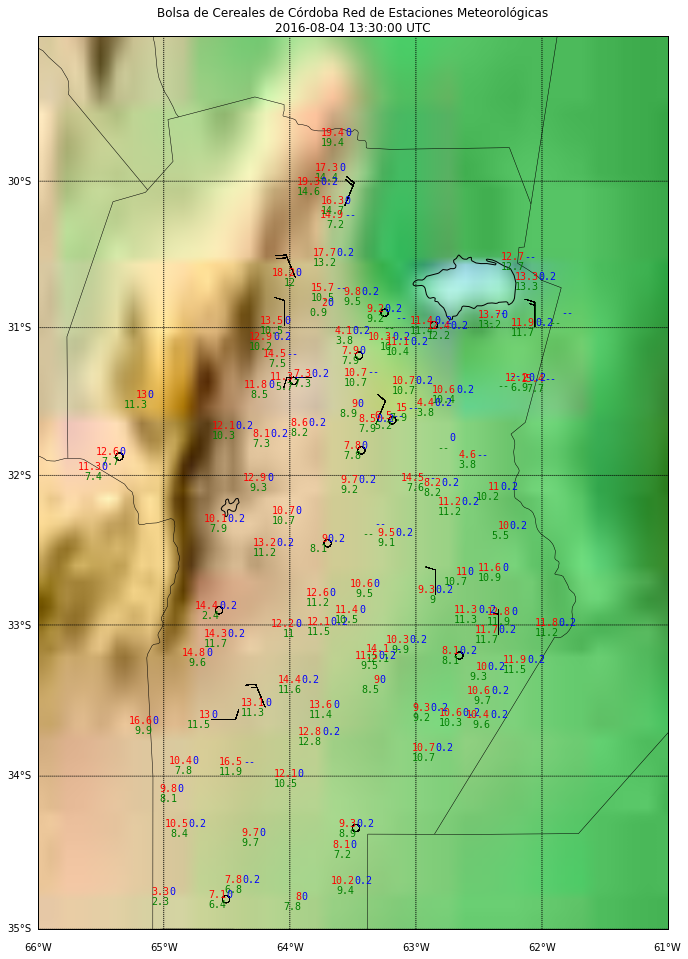

In [7]:
%pylab inline
from mpl_toolkits.basemap import Basemap

font = {'family': 'monospace',
        'weight': 'normal',
        'size': 10,
        }

plt.figure(figsize=(16,16))
m = Basemap(projection='merc',llcrnrlat=-35,urcrnrlat=-29.,llcrnrlon=-66,urcrnrlon=-61.,resolution='h')
m.etopo()
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# draw parallels.
parallels = np.arange(-50.,-20.,1.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,1.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
x, y = m(np.float32(wxframe['longitud'].values),np.float32(wxframe['latitud'].values))
time=pd.to_datetime(str(np.max(wxframe['fechamuestra'].values)))
plt.title('Bolsa de Cereales de Córdoba Red de Estaciones Meteorológicas\n{} UTC'.format(time))

for i in np.arange(len(x)):
    plt.text(x[i],y[i],'{}'.format(wxframe['temperatura'][i]),
            verticalalignment='bottom', horizontalalignment='right',color='red', fontdict=font)
    plt.text(x[i],y[i],'{}'.format(wxframe['puntorocio'][i]),
            verticalalignment='top', horizontalalignment='right',color='green', fontdict=font)
    plt.text(x[i],y[i],'{}'.format(wxframe['precipitaciondia'][i]),
        verticalalignment='bottom', horizontalalignment='left',color='blue', fontdict=font)

    plt.barbs(x,y,wxframe['u']*1.94,wxframe['v']*1.94,lw=0.25,flip_barb=True,antialiased=1)
plt.savefig('map_test.pdf')

In [8]:
#SAVE THE DATA TO CSV
datestr=pd.to_datetime(str(np.max(wxframe['fechamuestra'].values))).strftime('%Y-%m-%dT%H:%M:%SZ')
wxframe.to_csv(datestr+'_cordoba.csv')

In [9]:
#READ BACK
datatest=pd.read_csv(datestr+'_cordoba.csv')
datatest

,Unnamed: 0,altura,direccionviento,fechainstalacion,fechamuestra,humedad,latitud,localidad,longitud,nombre,...,precipitacionsemana,provincia,puntorocio,sensaciontermica,temperatura,temperaturamaxima,temperaturaminima,velocidadviento,u,v
0,0,197,247.5,11/06/2015,2016-08-04 13:30:00+00:00,100,-31.1903,Rio Primero,-63.4508,Acipro Santa Rosa 1,...,0.4,Cordoba,7.9,7.9,7.9,7.9,3.2,0.0,0.000000,0.000000
1,1,0,67.5,14/06/2013,2016-08-04 13:20:00+00:00,72,-31.8729,San Javier,-65.3513,Agri food - 30015,...,0,Cordoba,7.7,12.6,12.6,12.6,5.2,0.5,-0.461940,-0.191342
2,2,0,NaN,24/06/2014,2016-07-16 03:40:00+00:00,95,-31.8936,San Justo,-62.5189,Alicia - 30038,...,--,Cordoba,3.8,4.6,4.6,--,--,NaN,NaN,NaN
3,3,0,NaN,24/06/2014,2016-07-25 15:30:00+00:00,--,-30.9308,San Justo,-62.3747,Altos de Chipion - 30040,...,--,Co,--,--,NaN,--,--,NaN,NaN,NaN
4,4,0,NaN,24/06/2014,2016-07-25 15:20:00+00:00,71,-30.7579,Totoral,-63.6416,Cañada de Luque - 30030,...,--,Córdoba,10.5,15.7,15.7,--,--,NaN,NaN,NaN
5,5,0,NaN,24/06/2014,2016-07-20 14:20:00+00:00,63,-31.2083,Colón,-64.0274,Colonia Tirolesa - 30032,...,--,Cordoba,7.5,14.5,14.5,--,--,NaN,NaN,NaN
6,6,0,NaN,24/06/2014,2016-08-02 13:50:00+00:00,--,-31.3577,San Justo,-62.2565,Devoto - 30034,...,0,Córdoba,--,--,NaN,--,--,NaN,NaN,NaN
7,7,198,22.5,26/12/2012,2016-08-04 13:20:00+00:00,96,-31.6507,Rio Segundo,-63.3158,Escuela Loza - 30006,...,0.8,Córdoba,7.9,7.9,8.5,8.5,2.1,5.5,-2.104759,-5.081337
8,8,0,NaN,24/06/2014,2016-01-01 13:50:00+00:00,--,-30.9286,Castellanos,-61.8461,Eusebia - 30039,...,--,Santa Fe,--,--,NaN,--,--,NaN,NaN,NaN
9,9,0,NaN,24/06/2014,2016-07-22 15:40:00+00:00,60,-31.3798,Castellanos,-61.9789,Josefina - 30035,...,--,Santa Fe,7.7,15.4,15.4,--,--,NaN,NaN,NaN
